In [4]:
import numpy as np
import torch
from torch.autograd import Variable
import torch.nn as nn
import matplotlib.pyplot as plt
import math
from numpy.random import choice
from pathlib import Path
import scipy.interpolate
from FEM_TPT import *
from utils import *
import control_traj, rates
import scipy.stats
pitorch = torch.Tensor([math.pi])

In [7]:
# set parameters
beta = 10
rx = 0.3
ry = 0.4
betaT = torch.tensor(beta)
delt = torch.tensor(0.005)
gamma = torch.tensor(0.5)

model = torch.load('./data/Duffiing_gamma0.5_beta'+str(beta)+'_PINN.pt') 
model.eval()

# run trajectories and save the trajectories data

max_length = 20000
Num = 250
# I = control_traj.running_traj(max_length,Num,betaT,gamma,delt, model, rx, ry)


In [3]:
# np.save('./data/I_beta'+str(beta)+'_'+str(Num)+'.npy', I)

In [4]:
# rho_A, rho_AB, nu_AB = rates.rates_FEMpts(model, beta, gamma.item())
test_pts_file = './data/train_data_uniform.pt'
rho_AB_NN, nu_AB_NN = rates.rates_NNpts(test_pts_file, model, beta, gamma.item(), rx, ry)

In [6]:
dt =delt.item()

E_tau, E_tau_var, nu_AB_siml, lower, upper = rates.transition_rate_sample(dt,I,rho_AB_NN)

print('E_tau_AB at beta = {} is {:.4}, with plus/minus {}'.format(beta, E_tau, E_tau_var))
print('rho_AB using NN when beta = {} is {:.4}'.format(beta, rho_AB_NN))
print('transition rate for beta = {} with TPT is: {:.4}'.format(beta, nu_AB_NN))
print('transition rate for beta = {} with simulation is: {:.4}'.format(beta, nu_AB_siml))
print('confidence interval for transition rate at beta = {} is [{:.4},{:.4}]'.format(beta, lower, upper))

E_tau_AB at beta = 10 is 6.932, with plus/minus 0.3923494655634561
rho_AB using NN when beta = 10 is 0.03959
transition rate for beta = 10 with TPT is: 0.004528
transition rate for beta = 10 with simulation is: 0.005712
confidence interval for transition rate at beta = 10 is [0.005406,0.006054]


# plot trajectories

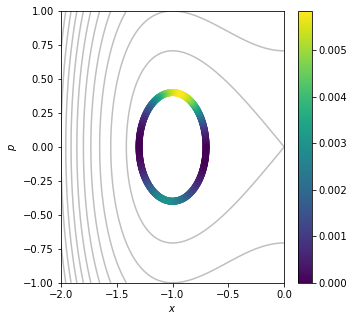

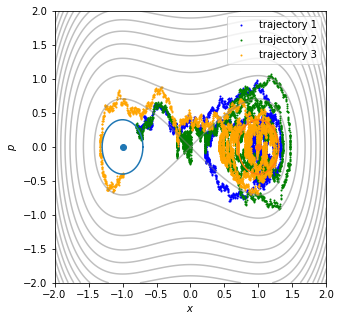

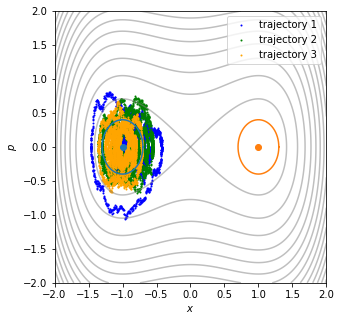

In [8]:
control_traj.plot_traj(5000,3,betaT,gamma,delt,model,rx = 0.3, ry = 0.4)